# EDA

## Importar dataset

In [47]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import pickle

total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

total_data.to_csv("../data/raw/total_data.csv", index = False)

print(total_data.shape)

total_data.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

## Eliminar duplicados e información irrelevante

In [48]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(41176, 21)

In [49]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [50]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Análisis de variables univariante

### Categóricas
- age, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

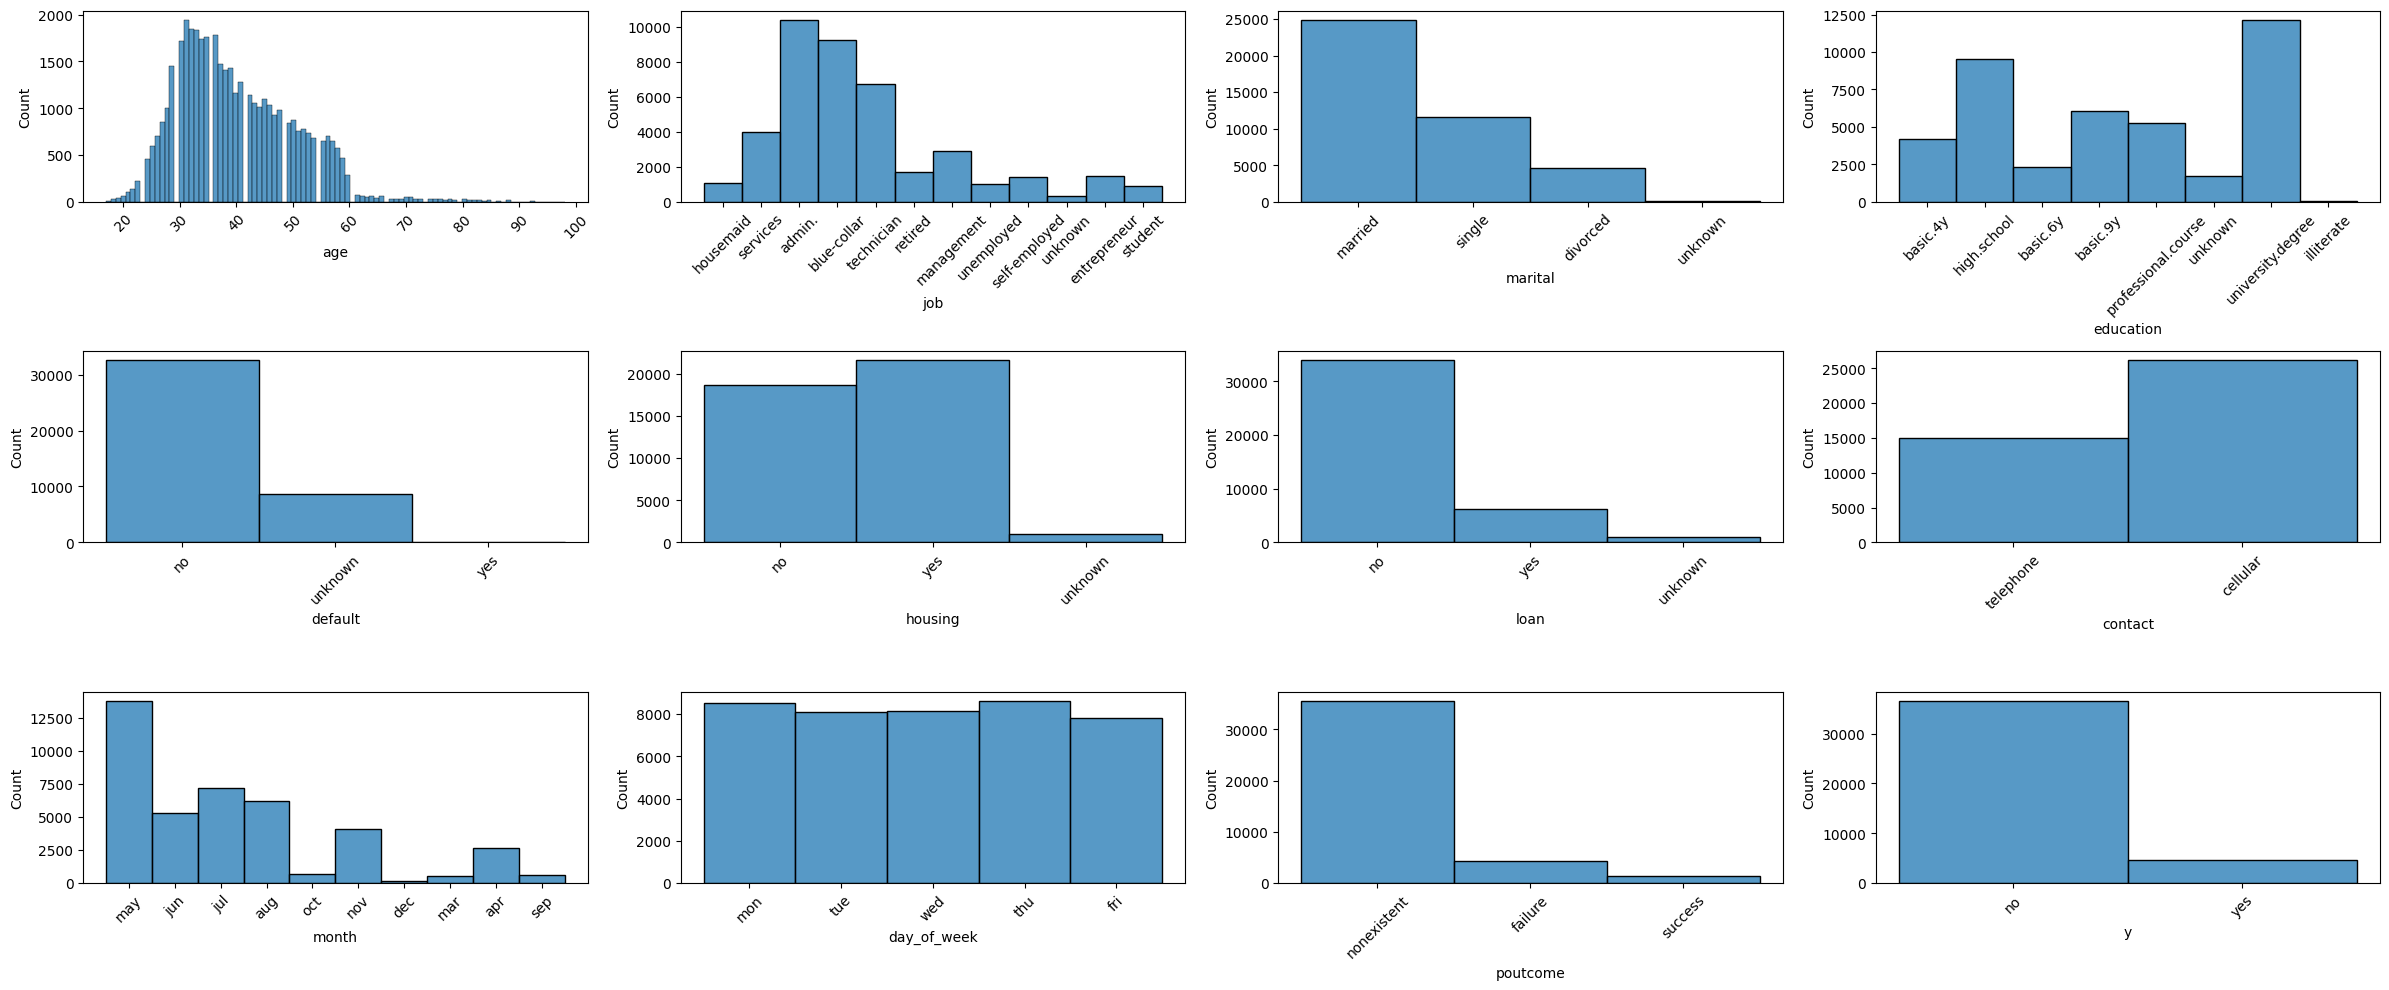

In [51]:
fig, axis = plt.subplots(3, 4, figsize = (24, 10))



sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "job")
sns.histplot(ax = axis[0, 2], data = total_data, x = "marital")
sns.histplot(ax = axis[0, 3], data = total_data, x = "education")
sns.histplot(ax = axis[1, 0], data = total_data, x = "default")
sns.histplot(ax = axis[1, 1], data = total_data, x = "housing")
sns.histplot(ax = axis[1, 2], data = total_data, x = "loan")
sns.histplot(ax = axis[1, 3], data = total_data, x = "contact")
sns.histplot(ax = axis[2, 0], data = total_data, x = "month")
sns.histplot(ax = axis[2, 1], data = total_data, x = "day_of_week")
sns.histplot(ax = axis[2, 2], data = total_data, x = "poutcome")
sns.histplot(ax = axis[2, 3], data = total_data, x = "y")



for row in axis:
    for ax in row:
        if ax in fig.axes:
            ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

- Age: La edad más común es entre los 30 y los 50
- Job: los trabajos más habituales son admin. y blue-collar. Hay mucha variedad
- Marital: el número de personas casadas es más del doble que solteras, que a su vez es el doble que de divorciadas
- Education: mayoría high.school y university degree
- default: la mayoría no tiene crédito y la cantidad de los que sí lo tienen es muy reducida o inexistente.
- housing: muy igualado entre el sí y el no, siendo ligeramente superior el sí.
- loan: la mayoría no tiene un préstamo personal
- contact: predomina el contacto por móvil
- month: el mes en el que más se contacta la última vez es mayo
- day_of_week: distribución muy igualada
- poutcome: muy destacado el resultado nonexistent y el failure por encima de success. Es una columna irrelevante.
- y: muy predominante el no


In [52]:
total_data = total_data.drop(columns=["poutcome"])

### Numéricas
- duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

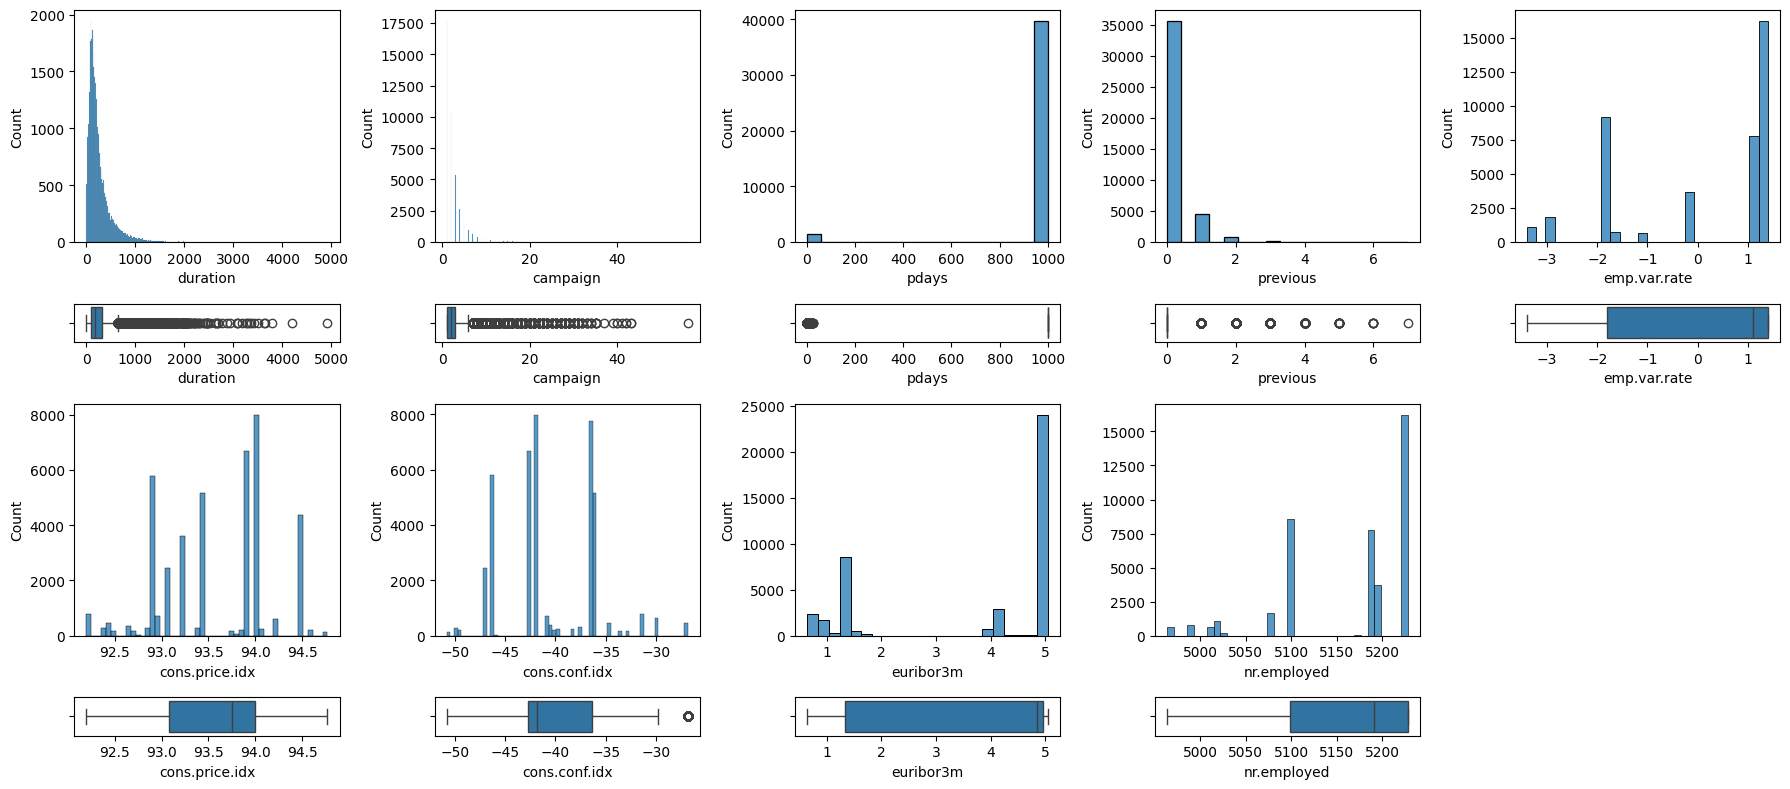

In [54]:
fig, axis = plt.subplots(4, 5, figsize=(18, 8), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax=axis[0, 0], data=total_data, x="duration")
sns.boxplot(ax=axis[1, 0], data=total_data, x="duration")

sns.histplot(ax=axis[0, 1], data=total_data, x="campaign")
sns.boxplot(ax=axis[1, 1], data=total_data, x="campaign")

sns.histplot(ax=axis[0, 2], data=total_data, x="pdays")
sns.boxplot(ax=axis[1, 2], data=total_data, x="pdays")

sns.histplot(ax=axis[0, 3], data=total_data, x="previous")
sns.boxplot(ax=axis[1, 3], data=total_data, x="previous")

sns.histplot(ax=axis[0, 4], data=total_data, x="emp.var.rate")
sns.boxplot(ax=axis[1, 4], data=total_data, x="emp.var.rate")

sns.histplot(ax=axis[2, 0], data=total_data, x="cons.price.idx")
sns.boxplot(ax=axis[3, 0], data=total_data, x="cons.price.idx")

sns.histplot(ax=axis[2, 1], data=total_data, x="cons.conf.idx")
sns.boxplot(ax=axis[3, 1], data=total_data, x="cons.conf.idx")

sns.histplot(ax=axis[2, 2], data=total_data, x="euribor3m")
sns.boxplot(ax=axis[3, 2], data=total_data, x="euribor3m")

sns.histplot(ax=axis[2, 3], data=total_data, x="nr.employed")
sns.boxplot(ax=axis[3, 3], data=total_data, x="nr.employed")

fig.delaxes(axis[2,4])
fig.delaxes(axis[3,4])

plt.tight_layout()

plt.show()

- duration: lo más habitual es que las llamadas menos de 500 segundos, aunque hay muchos outliers
- campaign: lo más habitual es entre 1 y 2 veces. también muchos outliers
- pdays: la mayoría han transcurrido 999 días
- previous: predomina el 0
- euribor3m: predomina el 5% aunque también en el 1 y 2

In [55]:
total_data["was_contacted"] = total_data["pdays"] != 999

total_data = total_data.drop(columns=["pdays"])


Con esto, `pdays` es eliminada y añadimos una nueva variable categórica `was_contacted`

## Análisis de variables multivariante

### Categórico - categórico : Correlaciones

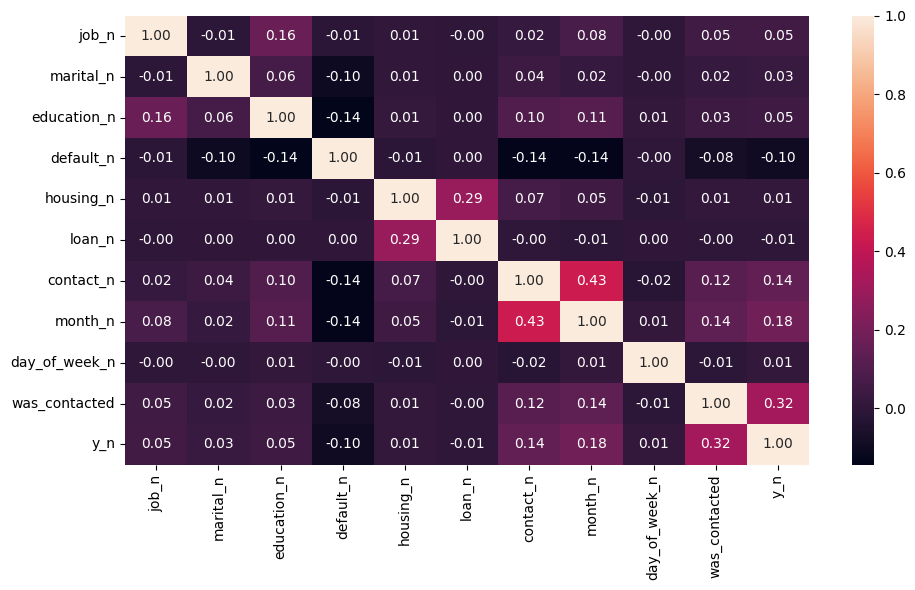

In [56]:
categoricas_normalizadas = [
    "job_n", "marital_n", "education_n", "default_n",
    "housing_n", "loan_n", "contact_n", "month_n",
    "day_of_week_n", "was_contacted", "y_n"
]


total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["was_contacted_n"] = pd.factorize(total_data["was_contacted"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[categoricas_normalizadas].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Was_contacted parece que afecta notablemente a si un cliente contrata un depósito o no

In [57]:

columnas = [
    ("job", "job_n"),
    ("marital", "marital_n"),
    ("education", "education_n"),
    ("default", "default_n"),
    ("housing", "housing_n"),
    ("loan", "loan_n"),
    ("contact", "contact_n"),
    ("month", "month_n"),
    ("day_of_week", "day_of_week_n"),
    ("was_contacted", "was_contacted_n"),
    ("y", "y_n")
]

transformation_rules = {}

for original_col, normalized_col in columnas:
    mapping = {
        row[original_col]: row[normalized_col]
        for _, row in total_data[[original_col, normalized_col]].drop_duplicates().iterrows()
    }
    transformation_rules[original_col] = mapping


with open("../models/transformation_rules.json", "w") as f:
    json.dump(transformation_rules, f, indent=4)


### Numérico - categórico: heatmap

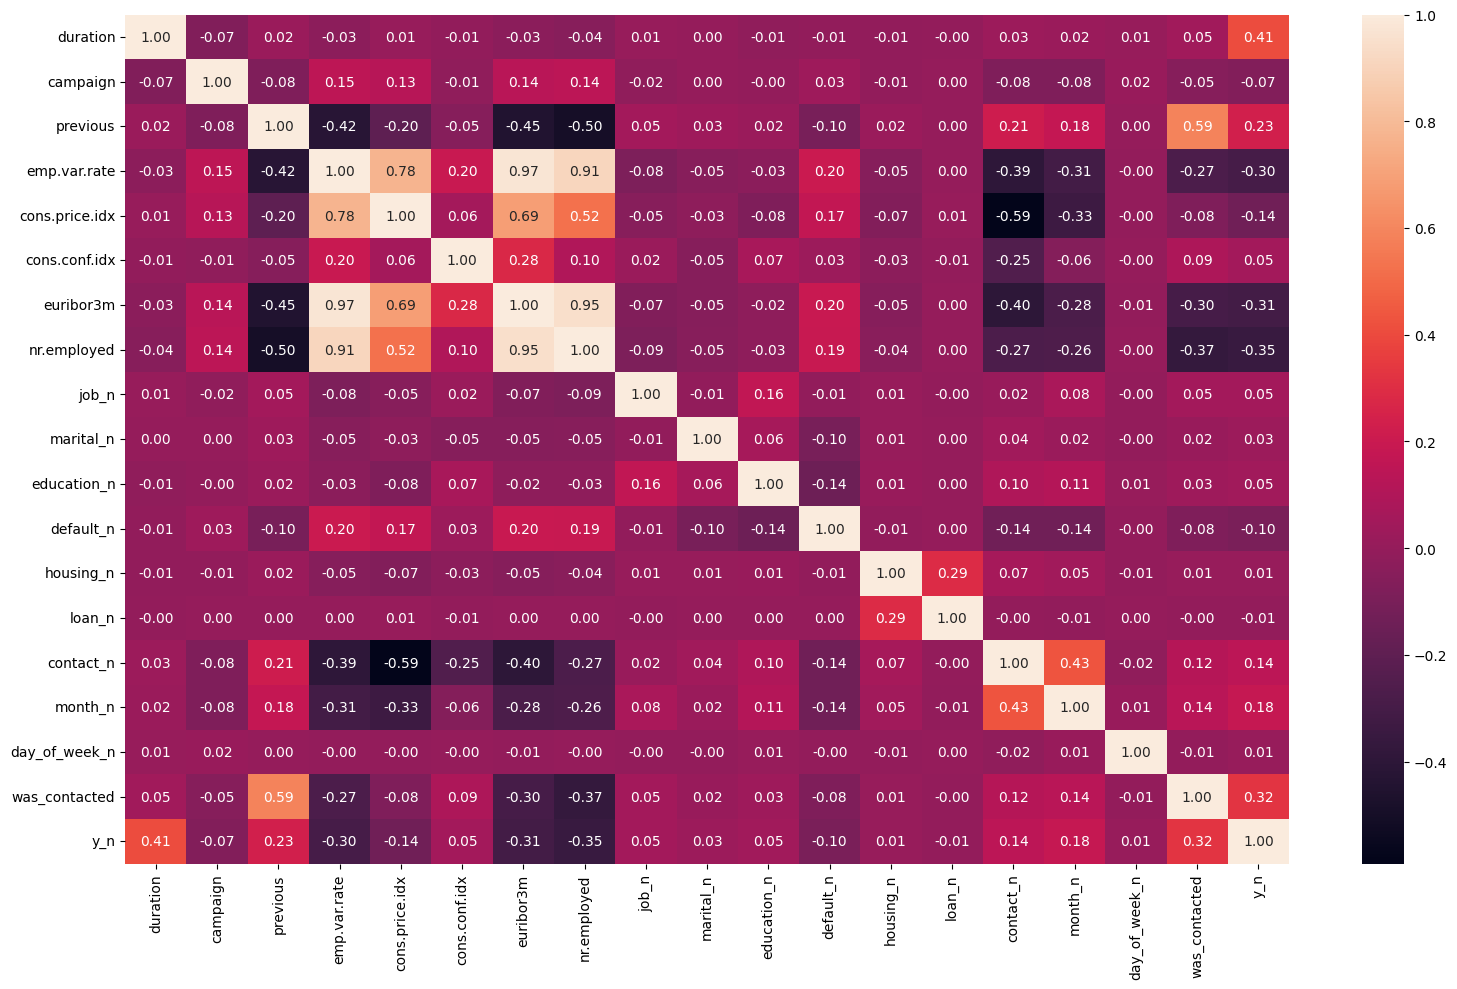

In [58]:
numericas_continuas = [
    "duration", "campaign", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed"
]
categoricas_normalizadas = [
    "job_n", "marital_n", "education_n", "default_n",
    "housing_n", "loan_n", "contact_n", "month_n",
    "day_of_week_n", "was_contacted","y_n"
]

columnas_para_heatmap = numericas_continuas + categoricas_normalizadas

fig, axes = plt.subplots(figsize=(16, 10))

sns.heatmap(total_data[columnas_para_heatmap].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Hay correlación enorme entre emp.var.rate, nr.employed y euribor3m y el efecto sobre y_n es muy similar. Se van a eliminar las 2 últimas
- Parece que a mayor duration más posible es el sí de "y"

In [59]:
total_data = total_data.drop(columns=["euribor3m", "nr.employed"])
numericas_continuas.remove("euribor3m")
numericas_continuas.remove("nr.employed")

## Ingeniería de características

### Outliers

In [60]:
total_data.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,was_contacted_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.173013,0.081922,93.575720,-40.502863,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.036793,0.112663
std,10.42068,259.305321,2.770318,0.494964,1.570883,0.578839,4.627860,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.188256,0.316184
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.000000,1.000000


- Duration, campaign : el máximo es muy alto

In [61]:
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr

  if lower_limit < 0:
    lower_limit = float(df[column].min())
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in numericas_continuas:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)



### Valores faltantes

In [62]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
previous           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
y                  0
was_contacted      0
job_n              0
marital_n          0
education_n        0
default_n          0
housing_n          0
loan_n             0
contact_n          0
month_n            0
day_of_week_n      0
was_contacted_n    0
y_n                0
dtype: int64

### Escalado de valores

In [63]:
num_variables=["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", 
               "job_n", "marital_n","education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "was_contacted_n"]

X_con_outliers = total_data_con_outliers.drop("y", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y", axis = 1)[num_variables]
y = total_data_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)


X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

#### Normalización

In [64]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_con_outliers,file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_sin_outliers,file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,was_contacted_n
12346,-1.058427,0.112453,0.152155,-0.348601,0.838815,0.589534,-0.470932,2.600348,-0.734095,-0.582336,-0.511455,0.788248,1.750366,-1.316322,-0.103815,1.433936,-0.195698
8564,0.954767,-0.305973,1.229538,-0.348601,0.838815,1.534740,-0.276368,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,-1.316322,-0.515428,0.014863,-0.195698
21417,-1.058427,-0.596546,0.511282,-0.348601,0.838815,-0.229530,0.955866,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,0.759693,0.307797,-0.694674,-0.195698
3315,-0.483229,-0.472568,-0.566100,-0.348601,0.647683,0.720860,0.891011,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,-1.316322,-0.927040,0.724399,-0.195698
33236,-0.003897,0.623862,-0.566100,-0.348601,-1.199927,-1.181648,-1.227566,-0.269237,0.698859,-1.040024,1.953044,-1.060840,-0.440002,0.759693,-0.927040,-0.694674,-0.195698


#### Min-max

In [65]:
min_max_con_outliers = MinMaxScaler()
min_max_con_outliers.fit(X_train_con_outliers)

with open("../models/min_max_con_outliers.pkl", "wb") as file:
    pickle.dump(min_max_con_outliers,file)

X_train_con_outliers_scal = min_max_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = min_max_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

min_max_sin_outliers = MinMaxScaler()
min_max_sin_outliers.fit(X_train_sin_outliers)

with open("../models/min_max_sin_outliers.pkl", "wb") as file:
    pickle.dump(min_max_sin_outliers,file)

X_train_sin_outliers_scal = min_max_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = min_max_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,was_contacted_n
12346,0.148148,0.058154,0.036364,0.0,1.000000,0.669135,0.338912,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.222222,1.00,0.0
8564,0.407407,0.036194,0.090909,0.0,1.000000,0.882307,0.376569,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.111111,0.50,0.0
21417,0.148148,0.020943,0.054545,0.0,1.000000,0.484412,0.615063,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.333333,0.25,0.0
3315,0.222222,0.027450,0.000000,0.0,0.937500,0.698753,0.602510,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.0
33236,0.283951,0.084994,0.000000,0.0,0.333333,0.269680,0.192469,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,0.25,0.0


## Selección de características

In [66]:
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

with open("../models/feature_selection_k_5.json", "w") as f:
    json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()

,duration,previous,emp.var.rate,month_n,was_contacted_n
0,0.058154,0.0,1.000000,0.222222,0.0
1,0.036194,0.0,1.000000,0.111111,0.0
2,0.020943,0.0,1.000000,0.333333,0.0
3,0.027450,0.0,0.937500,0.000000,0.0
4,0.084994,0.0,0.333333,0.000000,0.0


In [67]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)